In [1]:
#Custom modules
#How  we generally use LInear Class
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np


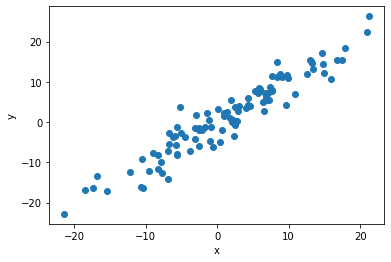

In [2]:
#creating dataset
x=torch.randn(100,1)*10
y=x+3*torch.randn(100,1)
plt.plot(x.numpy(),y.numpy(),'o')
plt.ylabel('y')
plt.xlabel('x')
plt.show()
#After creating dataset we need to fit our model

In [3]:
class LR(nn.Module):

  def __init__(self,input_size,output_size):
    super().__init__()
    self.linear=nn.Linear(input_size,output_size)
  def forward(self,x):
    pred=self.linear(x)
    return pred



In [4]:
torch.manual_seed(1)
model=LR(1,1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
w,b=model.parameters()
print(w,b)

Parameter containing:
tensor([[0.5153]], requires_grad=True) Parameter containing:
tensor([-0.4414], requires_grad=True)


In [6]:
#w1=w[0][0].item()
#b1=b[0].item()
#print(w1,b1)
def get_params():
  return(w[0][0].item(),b[0].item())

In [7]:
def plot_fit(title):
  plt.title=title
  w1,b1=get_params()
  x1=np.array([-30,30])
  y1=w1*x1+b1
  plt.plot(x1,y1,'r')
  plt.scatter(x,y)
  plt.show()


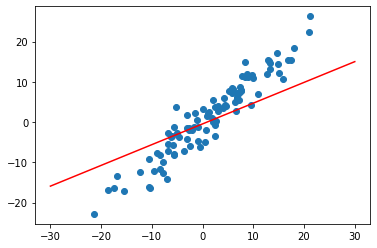

In [8]:
plot_fit('Initial_Model')

In [9]:
criterian=nn.MSELoss()
optimizer=torch.optim.SGD(model.parameters(),lr=0.01)

In [10]:
epochs=100
losses=[]
for i in range(epochs):
  y_pred=model.forward(x)
  loss=criterian(y_pred,y)
  print("epoch:",i,"loss",loss.item())
  losses.append(loss)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 30.411836624145508
epoch: 1 loss 17.605026245117188
epoch: 2 loss 12.268651008605957
epoch: 3 loss 10.043478965759277
epoch: 4 loss 9.114096641540527
epoch: 5 loss 8.72445297241211
epoch: 6 loss 8.559686660766602
epoch: 7 loss 8.488666534423828
epoch: 8 loss 8.456779479980469
epoch: 9 loss 8.441280364990234
epoch: 10 loss 8.432689666748047
epoch: 11 loss 8.427057266235352
epoch: 12 loss 8.422738075256348
epoch: 13 loss 8.419039726257324
epoch: 14 loss 8.415675163269043
epoch: 15 loss 8.412516593933105
epoch: 16 loss 8.409514427185059
epoch: 17 loss 8.40664005279541
epoch: 18 loss 8.403882026672363
epoch: 19 loss 8.40123176574707
epoch: 20 loss 8.398685455322266
epoch: 21 loss 8.396236419677734
epoch: 22 loss 8.393882751464844
epoch: 23 loss 8.391618728637695
epoch: 24 loss 8.38944149017334
epoch: 25 loss 8.387350082397461
epoch: 26 loss 8.385335922241211
epoch: 27 loss 8.383401870727539
epoch: 28 loss 8.381540298461914
epoch: 29 loss 8.37975025177002
epoch: 30 loss 8.3780

Text(0.5, 0, 'epoch')

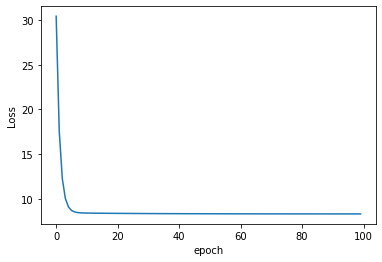

In [11]:
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

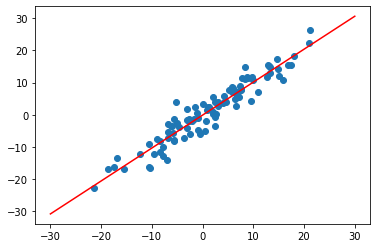

In [12]:
plot_fit("Trained Model")